# Isomap Faces

El siguiente ejemplo esta basado en el set de datos del paper original de Tenenbaum et al, que representa un conjunto de imagenes de rostros en distintas poses y condiciones de luz.

Isomap es de utilidad cuando mapping no lineal entre la informacion que tenemos representada en una gran cantidad de dimensiones y el manifold de menor dimension en el que queramos representar los datos.

En particular Isomap **es mejor que los metodos no lineales para lidiar con imagenes reales y motion tracking.**

En este caso haremos un reduccion a dos dimensiones para poder representarlo graficamente en 2D y al mismo tiempo, incluiremos en el plot algunas de las imagenes para tener una nocion de que estan representando esas dimensiones.

In [21]:
# https://github.com/iqbalu/3D_Pose_Estimation_CVPR2016/tree/master/tools_intern/toolboxes/isomap
import math

import pandas as pd
import scipy.io
pd.options.display.max_columns = 7

## Carga de datos y preprocesamiento


In [22]:
# carga de una matriz de matlab
mat = scipy.io.loadmat('face_data.mat')
df = pd.DataFrame(mat['images']).T

In [23]:
mat

{'__header__': b'MATLAB 5.0 MAT-file, Platform: LNX86, Created on: Thu Dec 21 04:26:42 2000',
 '__version__': '1.0',
 '__globals__': [],
 'lights': array([[183.0861572 , 199.01514669, 184.10538841, 139.3577519 ,
         134.41196618, 172.03528757, 118.93480401, 168.59492091,
         225.69529435, 179.22439371, 168.55662174, 202.83504668,
         186.95903207, 156.94374358, 229.65845917, 143.4639798 ,
         117.05607602, 215.21473194, 149.61149197, 193.71113301,
         186.52801843, 200.54259357, 189.51518564, 251.62456271,
         215.0741556 , 209.79062193, 110.46162048, 121.67536649,
         240.51718062, 224.86529081, 226.21863189, 200.98987707,
         132.06446969, 223.93876102, 209.15883204, 177.15248338,
         179.38476022, 169.70226051, 126.96143561, 118.8149692 ,
         241.48368782, 148.90096022, 246.93916132, 215.96239846,
         199.00845928, 171.91303056, 142.15796361, 234.36335688,
         245.45569555, 137.45932694, 172.75729851, 178.44175529,
        

In [24]:
# realizamos una serie de conversiones y preprocesamiento de los datos
num_images, num_pixels = df.shape
pixels_per_dimension = int(math.sqrt(num_pixels))

# rotacion de imagenes
for idx in df.index:
    df.loc[idx] = df.loc[idx].values.reshape(pixels_per_dimension, pixels_per_dimension).T.reshape(-1)
    
print(df.head())
print(df.shape)

       0         1         2     ...   4093  4094  4095
0  0.016176  0.000000  0.000000  ...    0.0   0.0   0.0
1  0.016176  0.000000  0.000000  ...    0.0   0.0   0.0
2  0.016176  0.000000  0.000000  ...    0.0   0.0   0.0
3  0.016176  0.110754  0.384988  ...    0.0   0.0   0.0
4  0.016176  0.000000  0.000000  ...    0.0   0.0   0.0

[5 rows x 4096 columns]
(698, 4096)


una vez realizado esto podemos considerar que contamos con 4096 dimensiones, dado que consideramos cada pixel como un feature/dimension.

Hay que tener en cuenta que si trabajamos con **informacion grafica es importante que este en la misma escala en este paso.**

## Aplicando Isomap

In [25]:
from sklearn import manifold
# http://scikit-learn.org/stable/modules/generated/sklearn.manifold.Isomap.html

# indicamos 6 vecinos mas cercanos y 2 componentes principales
iso = manifold.Isomap(n_neighbors=6, n_components=2)
iso.fit(df)
manifold_2da = iso.transform(df)
# reconstruimos el dataframe para facilitar la visualizacion
manifold_2d = pd.DataFrame(manifold_2da, columns=['Component 1', 'Component 2'])

# Nos quedan dos dimensiones
manifold_2d.head()

,Component 1,Component 2
0,26.169062,0.578853
1,-32.540561,12.856883
2,22.208342,-6.490292
3,-52.831644,30.531746
4,41.978740,-8.017211


## Visualizando la reduccion de dimensiones

Habiendo obtenido el resultado podemos realizar un plot de estas componentes considerando que hemos reducido 4096 dimensiones a 2.

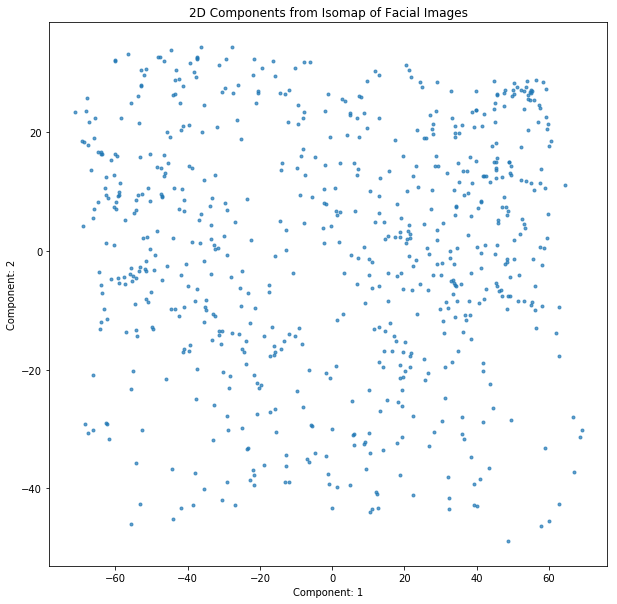

In [26]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

fig = plt.figure()
fig.set_size_inches(10, 10)
ax = fig.add_subplot(111)
ax.set_title('2D Components from Isomap of Facial Images')
ax.set_xlabel('Component: 1')
ax.set_ylabel('Component: 2')

# Show 2D components plot
ax.scatter(manifold_2d['Component 1'], manifold_2d['Component 2'], marker='.',alpha=0.7)

plt.show()

Algo interesante para lograr entender que representan 
las componentes obtenidas a partir de graficar algunas imagenes del set de datos.

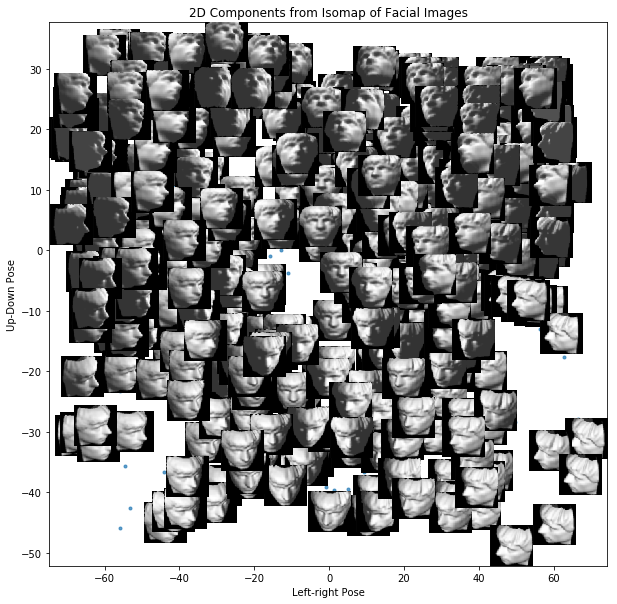

In [32]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

fig = plt.figure()
fig.set_size_inches(10, 10)
ax = fig.add_subplot(111)
ax.set_title('2D Components from Isomap of Facial Images')
ax.set_xlabel('Component: 1')
ax.set_ylabel('Component: 2')

images_to_display = 698


x_size = (max(manifold_2d['Component 1']) - min(manifold_2d['Component 1'])) * 0.08
y_size = (max(manifold_2d['Component 2']) - min(manifold_2d['Component 2'])) * 0.08
for i in range(images_to_display):
    img_num = np.random.randint(0, num_images)
    x0 = manifold_2d.loc[img_num, 'Component 1'] - (x_size / 2.)
    y0 = manifold_2d.loc[img_num, 'Component 2'] - (y_size / 2.)
    x1 = manifold_2d.loc[img_num, 'Component 1'] + (x_size / 2.)
    y1 = manifold_2d.loc[img_num, 'Component 2'] + (y_size / 2.)
    img = df.iloc[img_num,:].values.reshape(pixels_per_dimension, pixels_per_dimension)
    ax.imshow(img, aspect='auto', cmap=plt.cm.gray, 
              interpolation='nearest', zorder=100000, extent=(x0, x1, y0, y1))

# Show 2D components plot
ax.scatter(manifold_2d['Component 1'], manifold_2d['Component 2'], marker='.',alpha=0.7)


ax.set_ylabel('Up-Down Pose')
ax.set_xlabel('Left-right Pose')

plt.show()

Como puede verse por las direcciones de las caras, estas componentes representas distintos puntos de vista de las caras de izquierda a derecha y de abajo hacia arriba.